In [1]:
### import utils
import warnings, utils

warnings.filterwarnings('ignore')
utils.set_css_style('style.css')

# 1. Logistic Regression

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes (a small number of discrete values). Logistic regression is a classification model that brings great explicability between different variables, just like linear regression. Some of the examples of classification problems are Email spam or not spam, Online transactions Fraud or not Fraud, Tumor Malignant or Benign. For now, we will focus on the binary classification problem in which y can take on only two values, 0 and 1. 

Most of the notions that will be presented will also generalize to the multiple-class case.

For instance, if we are trying to build a spam classifier for email, then $x^{(i)}$ may be some feature of a piece of email, and y will be $1$ if the mail is spam, and 0 otherwise. Hence, $y \in \{0,1\}$. $0$ is also called the negative class, and $1$ the positive class. They are sometimes also denoted by the symbols "-" and "+". Given $x^{(i)}$, the corresponding $y^{(i)}$ is also called the label for the training example.

# 2. Hypothesis Representation

We could approach the classification problem ignoring the fact that $y$ is discrete-valued, and use our old linear regression algorithm to try to predict $y$ given $x$. However, it is easy to construct examples where this method performs very poorly.

<img src="figures/logistic_regression.png" alt="logistic_regression" style="width: 600px;"/>

Intuitively, it also doesn’t make sense for $h_{\boldsymbol{\theta}} (x)$ to take values larger than 1 or smaller than 0 when we know that $y \in \{0, 1\}$. To fix this, let’s change the form for our hypotheses $h_{\boldsymbol{\theta}}(x)$ to satisfy $0 \leq h_{\boldsymbol{\theta}} (x) \leq 1$. In order to map predicted values to probabilities, we use the Sigmoid function (Logistic function). The function maps any real value into a value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

Our new form uses the "Sigmoid Function," also called the "Logistic Function":

\begin{align*} & z = \boldsymbol{\theta}^\top \mathbf{x} \newline & g(z) = \dfrac{1}{1 + e^{-z}} \newline & h_{\boldsymbol{\theta}} (\mathbf{x}) = g ( \boldsymbol{\theta}^\top \mathbf{x} ) \end{align*}

Using one line to express our hypothesis:

\begin{equation}
h_{\boldsymbol{\theta}} (\mathbf{x}) = \dfrac{1}{1 + e^{-\boldsymbol{\theta}^\top \mathbf{x}}} = \dfrac{1}{1 + e^{-(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n)}}
\end{equation}


Where $\boldsymbol{\theta} = \begin{bmatrix}\theta_0 \newline \theta_1 \newline \vdots \newline \theta_n\end{bmatrix}$ and $\mathbf{x} = \begin{bmatrix}x_0 \newline x_1 \newline \vdots \newline x_n\end{bmatrix}$

Remark: we assume $x_{0}^{(i)} =1 \text{ for } (i\in { 1,\dots, m } )$. This allows us to do matrix operations with $\boldsymbol{\theta}$ and $\mathbf{x}$.

The following image shows us what the sigmoid function $g(z) = \dfrac{1}{1 + e^{-z}}$ looks like:

<img src="figures/sigmoid.svg.png" alt="sigmoid" style="width: 400px;"/>


$h_{\boldsymbol{\theta}}(x)$ will give us the probability that our output is 1. For example, $h_{\boldsymbol{\theta}}(\mathbf{x})=0.7$ gives us a probability of 70% that our output is 1. Our probability that our prediction is 0 is just the complement of our probability that it is 1 (e.g. if the probability that it is 1 is 70%, then the probability that it is 0 is 30%).

\begin{align*}& h_{\boldsymbol{\theta}}(\mathbf{x}) = p(y=1 | \mathbf{x} ; \boldsymbol{\theta}) = 1 - p(y=0 | \mathbf{x} ; \boldsymbol{\theta}) \newline& p(y = 0 | \mathbf{x} ; \boldsymbol{\theta}) + p(y = 1 | \mathbf{x} ; \boldsymbol{\theta}) = 1\end{align*}

### Logit Function

Logistic regression can be expressed as:

\begin{equation}
log(\frac{p(y = 1 | \mathbf{x} ; \boldsymbol{\theta})}{1- p(y = 1 | \mathbf{x} ; \boldsymbol{\theta}) }) = \boldsymbol{\theta}^\top \mathbf{x}
\end{equation}

Where the left-hand side is called the logit or log-odds function.
The odds signifies the ratio of the probability of success to the probability of failure. Therefore, in Logistic Regression, a linear combination of inputs is mapped to the log(odds).

# 3. Decision Boundary

When we pass the inputs through a hypothesis function, it returns a probability score between 0 and 1. We expect our classifier to give us a set of outputs or classes based on the probability.

It's great that we can obtain a probability from our logistic regression model. However, at the end of the day sometimes users just want a simple decision to be made for them, for their real-world problems. Should the email be sent to the spam folder or not? Should the loan be approved or not? Which road should we route the user through? How can we use our probability estimate to help the tool using our model to make a decision? We choose a **threshold**.

If we have 2 classes, we basically decide with a threshold value on the output probability above which we classify values into the positive class and if the value goes below the threshold then we classify it into the negative class.

In order to get our discrete 0 or 1 classification, one way is to consider a threshold of 0.5, we may translate the output of the hypothesis function in this case as follows:

\begin{align*}& h_{\boldsymbol{\theta}}(\mathbf{x}) \geq 0.5 \rightarrow y = 1 \newline& h_{\boldsymbol{\theta}}(\mathbf{x}) < 0.5 \rightarrow y = 0 \newline\end{align*}

<img src="figures/decision_boundary.png" alt="decision_boundary" style="width: 400px;"/>

The way our logistic function g behaves is that when its input is greater than or equal to zero, its output is greater than or equal to 0.5 (See sigmoid function above):

\begin{align*}& h_{\boldsymbol{\theta}}(\mathbf{x}) = g(\boldsymbol{\theta}^\top \mathbf{x}) \geq 0.5 \newline& \text{when} \; \boldsymbol{\theta}^\top \mathbf{x} \geq 0\end{align*}

From these statements we can now say:

\begin{align*}& \boldsymbol{\theta}^\top \mathbf{x} \geq 0 \Rightarrow y = 1 \newline& \boldsymbol{\theta}^\top \mathbf{x} < 0 \Rightarrow y = 0 \newline\end{align*}

The **decision boundary** for this threshold is the line $\boldsymbol{\theta}^\top \mathbf{x} = 0$ that separates the area where y = 0 and where y = 1.

So far, we have considered a simple threshold of a binary classification problem in which all probabilities less than or equal to 50 percent are classified into the positive class and all probabilities greater than 50 percent are classified into the negative class. However, for certain real-world problems, this threshold could be different. Depending on how we want the balance of our recall and precision, our false positives and false negatives... We can tune our choice of threshold to optimize the metric of our choice on a separate validation set. 

The Area-Under-Curve (AUC) of the ROC curve provides an aggregate measure of performance across all possible classification thresholds. AUC helps us choose between models when we don't know what decision threshold is going to be ultimately used. AUC is interpreted as follows: if we pick a random positive and a random negative what's the probability my model scores them in the correct relative order?

(For more info, go back to evaluation metrics in Chapter 2).

# 4. Cost Function

We learned about the cost function J(θ) in the Linear regression, the cost function represents optimization objective i.e. we create a cost function and minimize it so that we can develop an accurate model with minimum error.

If we try to use the cost function of the linear regression in ‘Logistic Regression’ then it would be of no use as it would end up being a **non-convex** function with **many local minimums**, in which it would be very difficult to minimize the cost value and find the global minimum.

Instead, our cost function for logistic regression looks like:

\begin{align*}
J(\boldsymbol{\theta}) & = \dfrac{1}{m} \sum_{i=1}^m \mathrm{Cost}(h_{\boldsymbol{\theta}}(\mathbf{x}^{(i)}),y^{(i)}) \newline
& = \dfrac{1}{m} \sum_{i=1}^m \left[-y^{(i)} \log(h_{\boldsymbol{\theta}}(\mathbf{x}^{(i)})) -(1-y^{(i)}) \log(1-h_{\boldsymbol{\theta}}(\mathbf{x}^{(i)}))\right]
\end{align*}

The cost can be written as:

\begin{align*}
& \mathrm{Cost}(h_{\boldsymbol{\theta}}(\mathbf{x}),y) = -\log(h_{\boldsymbol{\theta}}(\mathbf{x})) \; & \text{if y = 1} \newline 
& \mathrm{Cost}(h_{\boldsymbol{\theta}}(\mathbf{x}),y) = -\log(1-h_{\boldsymbol{\theta}}(\mathbf{x})) \; & \text{if y = 0}
\end{align*}

If our correct answer 'y' is 0, then the cost function will be 0 if our hypothesis function also outputs 0. If our hypothesis approaches 1, then the cost function will approach infinity.

If our correct answer 'y' is 1, then the cost function will be 0 if our hypothesis function outputs 1. If our hypothesis approaches 0, then the cost function will approach infinity.

<div class="row">
  <div class="column">
    <img src="figures/cost_1.png" alt="cost_1" style="width: 400px;"/>
  </div>
  <div class="column">
     <img src="figures/cost_0.png" alt="cost_0" style="width: 400px;"/>
  </div>
</div>

Unlike mean squared error, there is less emphasis on errors where the output is relatively close to the label where it's almost linear compared to quadratic. However, also unlike mean squared error, this loss function grows exponentially when the prediction is close to the opposite the label. In other words, there is a very high penalty when the model not only gets it wrong but does so with very high confidence. 

Note that writing the cost function in this way guarantees that $J(\boldsymbol{\theta})$ is convex for logistic regression.

A vectorized implementation is:

\begin{align*} & h = g(X \boldsymbol{\theta})\newline & J(\boldsymbol{\theta}) = \frac{1}{m} \cdot \left(-y^{T}\log(h)-(1-y)^{T}\log(1-h)\right) \end{align*}

The loss is called the **log-loss**. It is also known by the **log-likelihood**, or the **cross-entropy** loss.

# 5. Gradient Descent

Now the question arises, how do we reduce the cost value. Well, this can be done by using Gradient Descent. The main goal of Gradient descent is to minimize the cost value. i.e. min $J(\boldsymbol{\theta})$.

Remember that the general form of gradient descent is:

$$
\begin{align*}& Repeat \; \lbrace \newline & \; \theta_j := \theta_j - \alpha \dfrac{\partial}{\partial \theta_j}J(\boldsymbol{\theta}) \newline & \rbrace\end{align*}
$$

We can work out the derivative part using calculus to get:

\begin{align*} & Repeat \; \lbrace \newline & \; \theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^m (h_{\boldsymbol{\theta}}(\mathbf{x}^{(i)}) - y^{(i)}) \mathbf{x}_j^{(i)} \newline & \rbrace \end{align*}


"Conjugate gradient", "BFGS", and "L-BFGS" are more sophisticated, sometimes faster ways to optimize $\boldsymbol{\theta}$ that can be used instead of gradient descent. For more details [check here](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions).

**Regularization** is **very important** in logistic regression because driving the **log-loss** to zero is difficult and dangerous. First, as gradient descent seeks to minimize the log-loss, it pushes output values closer to one for positive labels and closer to zero for negative labels. Due to the equation of the sigmoid, the function asymptotes to zero when the logit function is negative infinity, and to one when the logit is positive infinity. To get the logits to negative or positive infinity, the weights are highly increased leading to numerical stability problems, overflows, and underflows. This is dangerous and can ruin our training. Also, near the asymptotes, as you can see from the graph, the sigmoid function becomes flatter and flatter. This means that the derivative is getting closer and closer to zero. Since we use the derivatives/gradients to update the weights, it is important for the gradients not to become zero, or else, training will stop. This is called saturation, or a vanishing gradient problem and makes training difficult.

It is also extremely important that our model generalizes so that we have the best predictions on new data which is the entire reason we create the model, to begin with. To help do this, it is important that we do not overfit our data. Therefore, adding in penalty terms to the objective function like with $L_1$ regularization for sparsity and $L_2$ regularization for keeping model weights small, or adding early stopping can help in this regard.

# 6. Multiclass Classification

## 6.1. One-vs-all

Now we will approach the classification of data when we have more than two categories. Instead of $y = \{0,1\}$ we will expand our definition so that $y = \{1,2,...C\}$.

Since $y = \{1,2,...C\}$, we divide our problem into $C$ binary classification problems; in each one, we predict the probability that 'y' is a member of one of our classes.

\begin{align*}
& y \in \lbrace1, 2 ... C\rbrace \newline
& h_{\boldsymbol{\theta}}^{(1)}(\mathbf{x}) = p(y = 1 | \mathbf{x} ; \boldsymbol{\theta}^{(1)}) \newline
& h_{\boldsymbol{\theta}}^{(2)}(\mathbf{x}) = p(y = 2 | \mathbf{x} ; \boldsymbol{\theta}^{(2)}) \newline
& \cdots \newline& h_{\boldsymbol{\theta}}^{(C)}(\mathbf{x}) = p(y =  C| \mathbf{x} ; \boldsymbol{\theta}^{(C)}) \newline
& \mathrm{prediction} = \max_{c \in \{1,2,...C\}}( h_{\boldsymbol{\theta}} ^{(c)}(\mathbf{x}) )\newline
\end{align*}

We are basically choosing one class and then lumping all the others into a single second class. We do this repeatedly, applying binary logistic regression to each case, and then use the hypothesis that returned the highest value as our prediction.

The following image shows how one could classify 3 classes:

<img src="figures/one-vs-all.png" alt="one-vs-all" style="width: 600px;"/>

**To summarize**: Train a logistic regression classifier $h_{\boldsymbol{\theta}}(\mathbf{x})$ for each class $c$ to predict the probability that $p(y = c)$. To make a prediction on a new $\mathbf{x}$, pick the class that maximizes $h_{\boldsymbol{\theta}}(\mathbf{x})$

Although this seems like a great solution, it comes with several problems. First, the scale of the confidence score might be different for each of the binary classification models, which biases our overall prediction. However, even if that isn't the case, each of the binary classification models, see very unbalanced data distributions since, for each one, the negative class is the sum of all the other classes, besides the one that is currently marked for the positive class. 

A possible fix for this imbalance problem is the one-verse-one method. Here, instead of having a model for each class, there is a model for each binary combination of the classes. If there are $n$ classes, this means that there would be $n(n-1)/2$ models, so in the order of $n^2$. If we have four classes, that would be six models, but if we have a thousand classes, like in many image classification use cases, there would be 499,500 models. Each model essentially outputs a vote for its predicted label. Then all the votes are accumulated and the class that has the most wins. However, this doesn't fix the ambiguity problem for the possibility of having the same number of votes for different classes.

## 6.2. Multinomial Logestic Regression (Softmax Regression)

### Hypothesis Representation

Softmax regression (or multinomial logistic regression) is a generalization of logistic regression to the case where we want to handle multiple classes. In logistic regression we assumed that the labels were binary: $y^{(i)}\in\{0,1\}$. Softmax regression allows us to handle $y^{(i)}\in\{1,…,C\}$ where C is the number of classes. Note that our convention will be to index the classes starting from 1, rather than from 0.

Given an input $\mathbf{x}$, we want our hypothesis to estimate the probability that $p(y=c|\mathbf{x})$ for each value of $c=\{1,…,C\}$. I.e., we want to estimate the probability of the class label taking on each of the $C$ different possible values. Thus, our hypothesis will output a C-dimensional vector (whose elements sum to 1) giving us our $C$ estimated probabilities. Concretely, our hypothesis $\mathbf{h}_{\Theta}(x)$ takes the form (Notice that our hypothesis function is now written in bold to demonstrate it's a vector $\mathbf{h}$):

\begin{equation}
\mathbf{h}_{\Theta}(\mathbf{x}) =
\begin{bmatrix}
h_{{\Theta}}^{(1)}(\mathbf{x}) \\
h_{{\Theta}}^{(2)}(\mathbf{x}) \\
\vdots \\
h_{{\Theta}}^{(C)}(\mathbf{x}) 
\end{bmatrix} =
\begin{bmatrix}
p(y = 1 | \mathbf{x}; {\Theta}) \\
p(y = 2 | \mathbf{x}; {\Theta}) \\
\vdots \\
p(y = C | \mathbf{x}; {\Theta}) 
\end{bmatrix} =
\frac{1}{ \sum_{c=1}^{C}{e^{\boldsymbol{\theta}^{(c)\top} \mathbf{x}} }}
\begin{bmatrix}
e^{\boldsymbol{\theta}^{(1)\top} \mathbf{x} } \\
e^{\boldsymbol{\theta}^{(2)\top} \mathbf{x} } \\
\vdots \\
e^{\boldsymbol{\theta}^{(C)\top} \mathbf{x} } \\
\end{bmatrix}
\end{equation}

Here $\boldsymbol{\theta}^{(1)} , \boldsymbol{\theta}^{(2)}, ..., \boldsymbol{\theta}^{(C)} \in \mathbb{R}^n$ are the parameters of our model. Notice that the term $\sum_{c=1}^{C} {e^{\boldsymbol{\theta}^{(c)\top} \mathbf{x}}}$ normalizes the distribution, so that it sums to one.

For convenience, we will also write ${\Theta}$ to denote all the parameters of our model. When you implement softmax regression, it is usually convenient to represent ${\Theta}$ as a (n+1)-by-C matrix obtained by concatenating $\boldsymbol{\theta}^{(1)} , \boldsymbol{\theta}^{(2)}, ..., \boldsymbol{\theta}^{(C)} $ into columns, so that

\begin{equation}
\Theta = \left[\begin{array}{cccc}| & | & | & | \\
\boldsymbol{\theta}^{(1)} & \boldsymbol{\theta}^{(2)} & \cdots & \boldsymbol{\theta}^{(C)} \\
| & | & | & |
\end{array}\right].
\end{equation}

### Cost Function
We now describe the cost function that we’ll use for softmax regression. In the equation below, $\mathbb{1}_{\left\{.\right\}}$ is the "indicator function", so that $\mathbb{1}_{\left\{\text{a true statement}\right\}}=1$, and $\mathbb{1}_{\left\{\text{a false statement}\right\}}$. For example, $\mathbb{1}_{\left\{\text{2+2=4}\right\}}$ evaluates to 1; whereas $\mathbb{1}_{\left\{\text{1+1=5}\right\}}$ evaluates to 0. Our cost function will be:

\begin{align}
J(\Theta) = - \left[ \sum_{i=1}^{m} \sum_{c=1}^{C}  \mathbb{1}_{\left\{y^{(i)} = c\right\}} \log p(y^{(i)} = c | \mathbf{x}^{(i)} ; \Theta)\right]
\end{align}

Notice that this generalizes the logistic regression cost function, which could also have been written:

\begin{align}
J(\boldsymbol{\theta}) &= - \left[ \sum_{i=1}^m   (1-y^{(i)}) \log (1-h_\boldsymbol{\theta}(\mathbf{x}^{(i)})) + y^{(i)} \log h_\boldsymbol{\theta}(\mathbf{x}^{(i)}) \right] \\
&= - \left[ \sum_{i=1}^{m} \sum_{c=0}^{1} \mathbb{1}_{\left\{y^{(i)} = c\right\}} \log p(y^{(i)} = c | \mathbf{x}^{(i)} ; \boldsymbol{\theta}) \right]
\end{align}

The softmax cost function is similar, except that we now sum over the C different possible values of the class label. Note also that in softmax regression, we have that

$$
p(y^{(i)} = c | \mathbf{x}^{(i)} ; \Theta) = \frac{e^{\boldsymbol{\theta}^{(c)\top} x^{(i)}}}{\sum_{c^\prime=1}^C e^{\boldsymbol{\theta}^{(c^\prime)\top} \mathbf{x}^{(i)}} }
$$




# 7. Logistic Regression with Scikit-Learn

## The dataset

The dataset we'll be using contain the results of a virtual driving simulation of vehicles with an AD system. Based on the results of these simulations, we would like to predict for a new vehicle, whether the distance to the vehicle in front is respected and whether the safety distance is kept at all times, namely 2 seconds.

This variable is therefore binary (Did the vehicle keep the safety distance? Yes or no). We call it a warning.

The explanatory variables are called metadata. These are variables entered in the simulation scenario.

In [33]:
# Import Package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

Reading the data in csv using `pandas`

In [34]:
metadata = pd.read_csv('Data/metadata.csv')
warnings = pd.read_csv('Data/warnings.csv')
print('metadata dataset size', str(metadata.shape))
print('warnings dataset size', str(warnings.shape))

metadata dataset size (19992, 13)
warnings dataset size (19990, 4)


In [35]:
metadata.head()

,scenario_id,AccelDur_s,LaneWidth_m,PVSpeed_kmh,PVPosit_m,PVAccel_ms2,PVDecel_ms2,PVCar,PVBus,PVMoto,Slope-6,Slope0,Slop6
0,5bc4920704c87d00012789f3,1.4,3.5,82.3,584.0,2.0,2.2,1,0,0,0,1,0
1,5bc4920704c87d00012789f4,1.9,3.5,97.3,563.0,1.5,2.8,1,0,0,0,1,0
2,5bc4920704c87d00012789f5,2.6,3.5,82.0,565.0,2.2,2.1,1,0,0,0,1,0
3,5bc4920704c87d00012789f6,1.8,3.5,83.3,687.0,2.2,1.2,1,0,0,0,1,0
4,5bc4920704c87d00012789f7,2.6,3.5,102.7,562.0,1.4,2.5,1,0,0,0,1,0


In [36]:
warnings.head()

,scenario_id,longitudinal_deceleration,safety_distance_m,safety_distance_s
0,5bc4920704c87d00012789f3,1.0,0.0,0.0
1,5bc4920704c87d00012789f4,0.0,1.0,1.0
2,5bc4920704c87d00012789f5,1.0,0.0,0.0
3,5bc4920704c87d00012789f6,1.0,0.0,0.0
4,5bc4920704c87d00012789f7,0.0,1.0,1.0


From `warnings` dataframe, we will only keep "safety_distance_s".

In [37]:
warnings = warnings[["scenario_id","safety_distance_s"]]

Let's join the dataframes together using the common key `scenario_id`

In [38]:
df = metadata.merge(warnings, left_on='scenario_id', right_on='scenario_id')
df = df.set_index('scenario_id')

In [39]:
#verification merge
df.head()

,AccelDur_s,LaneWidth_m,PVSpeed_kmh,PVPosit_m,PVAccel_ms2,PVDecel_ms2,PVCar,PVBus,PVMoto,Slope-6,Slope0,Slop6,safety_distance_s
scenario_id,,,,,,,,,,,,,
5bc4920704c87d00012789f3,1.4,3.5,82.3,584.0,2.0,2.2,1,0,0,0,1,0,0.0
5bc4920704c87d00012789f4,1.9,3.5,97.3,563.0,1.5,2.8,1,0,0,0,1,0,1.0
5bc4920704c87d00012789f5,2.6,3.5,82.0,565.0,2.2,2.1,1,0,0,0,1,0,0.0
5bc4920704c87d00012789f6,1.8,3.5,83.3,687.0,2.2,1.2,1,0,0,0,1,0,0.0
5bc4920704c87d00012789f7,2.6,3.5,102.7,562.0,1.4,2.5,1,0,0,0,1,0,1.0


In [40]:
df.shape

(19990, 13)

The **describe()** method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

In [41]:
df.describe()

,AccelDur_s,LaneWidth_m,PVSpeed_kmh,PVPosit_m,PVAccel_ms2,PVDecel_ms2,PVCar,PVBus,PVMoto,Slope-6,Slope0,Slop6,safety_distance_s
count,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000,19990.000000
mean,2.523307,3.199970,85.232131,610.019210,1.995908,1.498624,0.333317,0.333317,0.333367,0.250025,0.249975,0.249975,0.469485
std,1.448339,0.300008,14.469862,56.911916,0.578122,0.868606,0.471410,0.471410,0.471428,0.433038,0.433009,0.433009,0.499080
min,0.000000,2.900000,60.000000,508.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.300000,2.900000,72.700000,561.000000,1.500000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.500000,2.900000,85.400000,610.000000,2.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.800000,3.500000,97.700000,659.000000,2.500000,2.300000,1.000000,1.000000,1.000000,0.750000,0.000000,0.000000,1.000000
max,5.000000,3.500000,110.000000,712.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data preparation: splitting data into training and test sets

We will start by preparing the data:
    1. Creation of X and y
    2. Splitting the data into training and test sets

In [42]:
# X: explanatory variables / y: variable to predict
X = df.drop('safety_distance_s', axis=1)
y = df[["safety_distance_s"]]

In [43]:
#Création des sets d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model training

Let's define our LogesticRegression, and fit it using the training set.

The Logestic Regression model on `scikit-learn` has a number of arguments, let's list some of them:

* **penalty**: {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’: Used to specify the norm used in the regularization penalization.
* **C**: float, default=1.0: Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.
* **l1_ratio**: float, default=None:  The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'.
* **fit_intercept**: bool, default=True: Specifies if a constant (a.k.a. bias or intercept $\theta_0$) should be added to the decision function.
* **solver**: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’: Optimization algorithm to use in the optimization problem.
* **random_state**: int, RandomState instance, default=None: The seed of the pseudo random number generator to use when shuffling the data. 

In [61]:
## training the model
## Let tune the 'penalty' and 'C' hyperparameters
param_grid = {'penalty': ['l1', 'l2', 'none'],
              'C': [0.001, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.3, 0.5, 1, 10]}

logR = LogisticRegression(random_state=42, fit_intercept=True)
search = GridSearchCV(logR, param_grid, scoring='accuracy', cv=5)
search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2,
                               0.3, 0.5, 1, 10],
                         'penalty': ['l1', 'l2', 'none']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

The attribute "coef_" allows us to list the coefficients $\theta_1$, $\theta_2$, ... $\theta_{12}$ of our 12 features.

In [71]:
logR = search.best_estimator_
print(logR)

LogisticRegression(C=0.03, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [63]:
logR.coef_

array([[ 0.07580927,  1.41879654,  0.03301151, -0.01501184, -1.17196083,
         1.20249636,  0.05403447,  1.35385761,  0.01417974, -0.43617967,
        -0.45736431,  0.20509376]])

We can also get our intercept $\theta_0$ with the attribute "intercept_".

In [64]:
logR.intercept_

array([1.63172657])

## Model predictions

In [67]:
# predicting over training & testing datasets
y_train_pred = logR.predict(X_train)
y_test_pred = logR.predict(X_test)

Printing the first 10 predictions:

In [68]:
y_test_pred[:10]

array([0., 1., 0., 1., 1., 0., 1., 0., 0., 1.])

##  Model evaluation 

### Accuracy

There are other ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc). The accuracy is very simple to obtain. To get the mean accuracy on the given training dataset, we can use the method `score`:

In [69]:
logR.score(X_train, y_train)

0.7695276209533338

To get the mean accuracy on the given test dataset, we can also use the method `score`:

In [70]:
logR.score(X_test, y_test)

0.7907286976821745

### Confusion Matrix

In [72]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[2624,  586],
       [ 669, 2118]])

`scikit-learn` also offers a nice function to plot the confusion matrix.

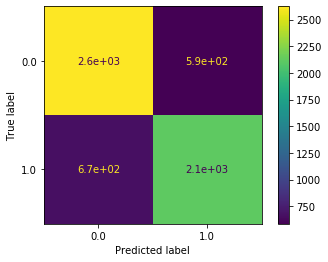

In [73]:
metrics.plot_confusion_matrix(logR, X_test, y_test)

### Recall

The recall of each class:

In [74]:
metrics.recall_score(y_test, y_test_pred, average=None)

array([0.81744548, 0.75995694])

### Precision

The precision of each class:

In [75]:
metrics.precision_score(y_test, y_test_pred, average=None)

array([0.79684179, 0.78328402])

### F1score

The f1score of each class:

In [76]:
metrics.f1_score(y_test, y_test_pred, average=None)

array([0.80701215, 0.77144418])

### Receiver Operating Characteristic - AUC

In able to plot ROC or evaluate AUC, we need the probability outputs of our model instead of the final prediction.

We call the `predict_proba` method rather than `predict` in order to obtain a list of probabilities which represent the likelihood that a sample falls under a given category. 

In [77]:
probs = logR.predict_proba(X_test)
malignant_probs = probs[:,1]

# calculating roc arguments
fpr, tpr, thresholds = metrics.roc_curve(y_test, malignant_probs)
# calculating auc
roc_auc = metrics.auc(fpr, tpr)

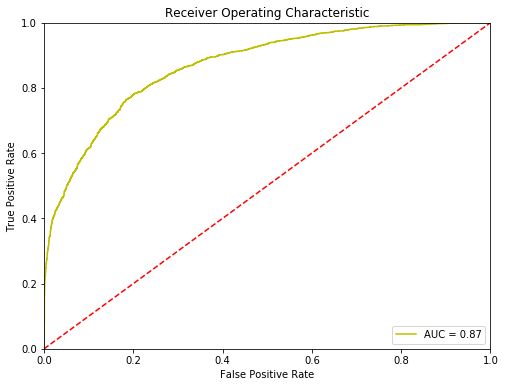

In [78]:
plt.figure(figsize=[8,6])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# References

Stanford, UFLDL Tutorial. (2013, 26 Sep). Deep Learning Tutorial: Softmax Regression. Retrieved from http://deeplearning.stanford.edu/tutorial/supervised/SoftmaxRegression/.


